In [ ]:
import torch
import pandas as pd
from torch.utils.data import DataLoader
from torchvision.transforms import v2 as T
from face_detection import FaceDetectionPipeline
from models.net import ConvolutionNet
from models.transform import PILToNormalizedTensor
from PIL import Image
from data import CustomProcessedDataset
from models.net import ConvolutionNet

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

class FaceRecognition:
    FEATURES = 256
    DROP_OUT = 0.2

    def __init__(self, model_path: str, device: str):
        self.device = device
        # Get mapper
        self.mapper = {
            int(row["Target"]): str(row["Name"])
            for _, row in pd.read_csv("./data/processed/mapping.csv").iterrows()
        }
        # Get pipeline
        self.pipeline = FaceDetectionPipeline(device)
        self.normalize = PILToNormalizedTensor()
        # Get model
        self.num_classes = len(self.mapper)
        self.model = ConvolutionNet(self.num_classes, 256, 0.2)
        self.model.load_state_dict(torch.load(model_path, weights_only=True))
        self.model.to(device)
        self.model.eval()

    def predicts(self, image: Image):
        image = self.pipeline(image)
        image = self.normalize(image)
        image = image.unsqueeze(0).to(self.device)
        outputs = self.model(image)
        probs = torch.exp(outputs)
        preds = probs.max(dim=1).indices
        return outputs, probs, preds

In [96]:
f = FaceRecognition("./models/convolution_net_1.pth", DEVICE)

In [99]:
mapper[134]

'Nestor_Kirchner'

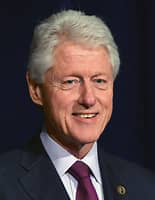

In [97]:
image = Image.open("./images/BillClinton.jpg")
image

In [98]:
f.predicts(image)

(tensor([[-53.3355, -55.7317, -33.0144, -27.0224, -43.6102, -44.3038, -44.2875,
          -43.8245, -33.5414, -36.8309, -55.5711, -19.2309, -41.5613, -47.2227,
          -34.4475, -57.5396, -31.2379, -15.6645, -28.0343, -32.5921,  -2.2540,
          -22.4078, -23.0445, -40.7319, -26.2464, -15.7158, -45.4346, -71.8282,
          -22.3470, -47.9938, -60.6741, -33.5482, -30.5087, -32.8062, -16.1450,
          -53.4573, -46.0283, -24.2549, -45.4303, -11.8603, -17.1722, -12.4521,
          -18.2382, -15.9754, -30.3829, -49.7029, -12.0465, -27.8741, -28.9125,
          -20.1768, -13.1613,  -7.7557, -50.7655, -17.3862, -45.2147, -12.6876,
          -47.8612, -80.7841, -31.7772, -18.1167, -31.0881, -47.0127, -26.0126,
          -20.8252, -27.4383, -36.4493, -26.9672, -14.9104, -48.4341, -19.5356,
          -31.5205, -35.4879,  -6.3518, -20.9795, -60.4216, -30.3087, -46.5883,
          -30.2264, -29.1876, -20.7854, -16.2273, -29.1397, -34.0407, -36.5660,
          -46.6562, -48.6225, -24.2743, 

In [ ]:
        images, targets = images.to(device), targets.to(device)
        optimizer.zero_grad()
        # Get predition
        outputs = model(images)
        probs = torch.exp(outputs)
        preds = probs.max(dim=1).indices
        # Calculate loss
        loss = loss_fn(outputs, targets)
        # Update parameters
        loss.backward()
        optimizer.step()
        # Update metrics
        train_loss += loss.item()
        train_accuracy += torch.sum(targets.data == preds).item()
        # Logging
        batch += 1
        print(f"Epoch {epoch} --- Training: Batch {batch}/{len(dataloader)}", end="\r")

In [77]:
mapper = {
    int(row["Target"]): str(row["Name"])
    for _, row in pd.read_csv("./data/processed/mapping.csv").iterrows()
}
num_classes = len(mapper)
model = ConvolutionNet(num_classes, 256, 0.2)
model.load_state_dict(torch.load("./models/convolution_net_1.pth", weights_only=True))
model.to(DEVICE)
model.eval()

ConvolutionNet(
  (block1): DoubleConvBlock(
    (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
  )
  (block2): DoubleConvBlock(
    (conv_1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
  )
  (block3): DoubleConvBlock(
    (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
  )
  (block4): DoubleConvBlock(
    (conv_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_di

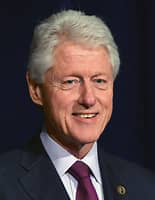

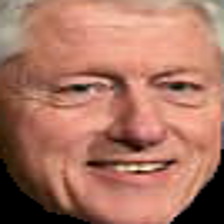

In [69]:
pipeline = FaceDetectionPipeline(DEVICE)
image = pipeline(image)
image

In [70]:
out = PILToNormalizedTensor()(image)
out.shape

torch.Size([3, 224, 224])

In [80]:
out.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [81]:
f.model(out.unsqueeze(0))

tensor([[-53.3241, -55.7193, -32.9972, -26.9893, -43.5836, -44.2814, -44.2707,
         -43.7846, -33.5294, -36.7989, -55.5407, -19.2142, -41.5477, -47.1924,
         -34.4163, -57.5222, -31.2224, -15.6470, -28.0226, -32.5631,  -2.2584,
         -22.3943, -23.0311, -40.7085, -26.2331, -15.7002, -45.4071, -71.7909,
         -22.3441, -47.9817, -60.6757, -33.5186, -30.4850, -32.7858, -16.1210,
         -53.4238, -46.0161, -24.2361, -45.4129, -11.8530, -17.1600, -12.4291,
         -18.2286, -15.9597, -30.3654, -49.6992, -12.0382, -27.8651, -28.9031,
         -20.1852, -13.1484,  -7.7540, -50.7551, -17.3741, -45.2081, -12.6838,
         -47.8209, -80.7485, -31.7694, -18.1026, -31.0753, -46.9816, -26.0113,
         -20.8163, -27.4227, -36.4320, -26.9611, -14.8988, -48.4112, -19.5118,
         -31.5124, -35.4717,  -6.3484, -20.9628, -60.3710, -30.2952, -46.5641,
         -30.2257, -29.1726, -20.7736, -16.2293, -29.1119, -34.0093, -36.5320,
         -46.6485, -48.5984, -24.2620, -49.7217, -31

In [31]:
out = f.predicts(image)

In [75]:
test_dataset = CustomProcessedDataset("./data/processed/test", transform=PILToNormalizedTensor())
test_loader = DataLoader(test_dataset, batch_size=1, num_workers=4)

In [ ]:
for i, j in test_loader:
    model
    print(i.shape)
    break

torch.Size([1, 3, 224, 224])
